In this notebook, we show step-by-step how to perform text classification by fine-tuning a BERT-based model.

Here we install the transformers package, from Hugging Face. We use one of its pre-trained BERT models, more specifically a compact model that is trained through model distillation. We will use the package to:

Tokenize the text according to the BERT model specification, using its BertTokenizer class
Instantiate a pre-trained BERT model, modified for the text classification task, using its BertForSequenceClassification class, that we will then fine-tuning for our specific dataset.
For a comprehensive tutorial about using this package to fine-tune BERT for text classification.

Please notice that this notebook was create in  colab environment. This environment already has all other packages we need here such as NumPy, Pandas, Scikit-Learn, and PyTorch.

In [1]:
!pip install transformers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CoDASH-nDuplicated.csv')
print(df.shape)

(6765, 4)


In [4]:
df.head(50)

,Unnamed: 0,category,language,value
0,1,Others,en,error! :( your browser is not running javascri...
1,3,Others,en,"hacker idiot – just another wordpress site , s..."
2,5,Others,en,"tor node - onion links directory , tor node ,..."
3,10,Others,en,"our realm :: search beyond censorship , home ..."
4,13,Others,en,dark tor | onion links | deep web | hidden wi...
5,17,Others,en,"dwl - deep web links , dwl - deep web links..."
6,32,Others,en,"rcp system - log in , rcp system , remember me?"
7,JBravo,Hacking,en,FBI Hacking AND FORENSIC TOOLKIT HACK INTO PHONES
8,JBravo,Hacking,en,WATCH ME CashOut Credit card in Front of YOU $...
9,JBravo,Hacking,en,$2752 ULTIMATE POKER CC CASHOUT WORKS WORLDWIDE


In [5]:
label_counts = pd.DataFrame(df['category'].value_counts())
label_counts

,count
category,
Hacking,2940
Others,2087
Electronic,1738


In [6]:
labels = df['category'].unique().tolist()
labels = [s.strip() for s in labels]
for key, value in enumerate(labels):
  print(value)

Others
Hacking
Electronic


In [7]:
NUM_LABELS = len(labels)
id2label = {id:label for id,label in enumerate(labels)}
label2id = {label:id for id,label in enumerate(labels)}
label2id

{'Others': 0, 'Hacking': 1, 'Electronic': 2}

In [8]:
id2label

{0: 'Others', 1: 'Hacking', 2: 'Electronic'}

In [9]:
df["Product_Label"] = df.category.map(lambda x: label2id[x.strip()])
df.head(10)

,Unnamed: 0,category,language,value,Product_Label
0,1,Others,en,error! :( your browser is not running javascri...,0
1,3,Others,en,"hacker idiot – just another wordpress site , s...",0
2,5,Others,en,"tor node - onion links directory , tor node ,...",0
3,10,Others,en,"our realm :: search beyond censorship , home ...",0
4,13,Others,en,dark tor | onion links | deep web | hidden wi...,0
5,17,Others,en,"dwl - deep web links , dwl - deep web links...",0
6,32,Others,en,"rcp system - log in , rcp system , remember me?",0
7,JBravo,Hacking,en,FBI Hacking AND FORENSIC TOOLKIT HACK INTO PHONES,1
8,JBravo,Hacking,en,WATCH ME CashOut Credit card in Front of YOU $...,1
9,JBravo,Hacking,en,$2752 ULTIMATE POKER CC CASHOUT WORKS WORLDWIDE,1


In [10]:
label_values = list(label_counts.index)
order = list(pd.DataFrame(df['Product_Label'].value_counts()).index)
label_values = [l for _,l in sorted(zip(order, label_values))]

label_values

['Others', 'Hacking', 'Electronic']

In [11]:
df = df[df['value'].notnull()]

In [12]:
texts = df['value'].values
labels = df['Product_Label'].values

In [13]:
text_lengths = [len(texts[i].split()) for i in range(len(texts))]
print(min(text_lengths))
print(max(text_lengths))

0
5730


In [14]:
sum([1 for i in range(len(text_lengths)) if text_lengths[i] >= 256])

917

In [15]:
# Exploring the text lengths
text_len = df['value'].apply(lambda x: len(x.split()))

In [16]:
text_len

,value
0,57
1,121
2,1083
3,30
4,63
...,...
6760,3
6761,4
6762,5
6763,5


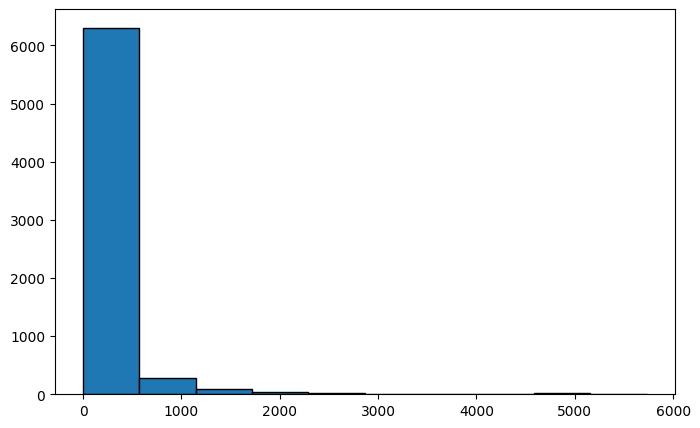

In [17]:
import matplotlib.pyplot as plt
# vsualize the text length
import seaborn as sns
plt.figure(figsize=(8,5))
plt.hist(text_len, edgecolor = "black");

# **Word Count**

In [18]:
#1. WORD-COUNT
df['word_count'] = df['value'].apply(lambda x: len(str(x).split()))
Hack_W = df[df['Product_Label']==1]['word_count'].mean()
Others_W = df[df['Product_Label']==0]['word_count'].mean()
Electronics_W = df[df['Product_Label']==2]['word_count'].mean()
print("Sum of All Words Count is :", Hack_W + Others_W + Electronics_W)

Sum of All Words Count is : 474.3618974261859


In [19]:
#2. CHARACTER-COUNT
df['char_count'] = df['value'].apply(lambda x: len(str(x)))
Hack_Ch = df[df['Product_Label']==1]['char_count'].mean()
Others_Ch = df[df['Product_Label']==0]['char_count'].mean()
Electronis_Ch = df[df['Product_Label']==2]['char_count'].mean()
print("Sum of All Characters Count is :", Hack_Ch + Others_Ch + Electronis_Ch)

Sum of All Characters Count is : 3703.853223019719


In [20]:
#3. UNIQUE WORD-COUNT
df['unique_word_count'] = df['value'].apply(lambda x: len(set(str(x).split())))
Hack_U = df[df['Product_Label']==1]['unique_word_count'].mean()
Others_U = df[df['Product_Label']==0]['unique_word_count'].mean()
Electronics_U = df[df['Product_Label']==2]['unique_word_count'].mean()
print("Sum of All Unique Characters Count is :", Hack_U + Others_U + Electronics_U)

Sum of All Unique Characters Count is : 218.56073795988345


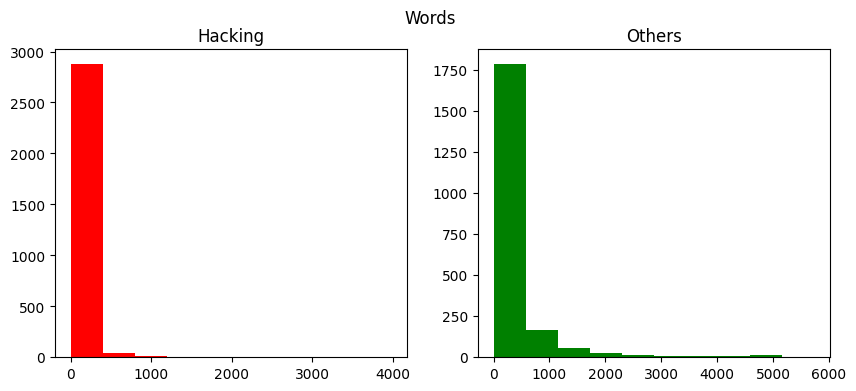

In [21]:
#Plotting word-count
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df[df['Product_Label']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Hacking')
train_words=df[df['Product_Label']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Others')
fig.suptitle('Words')
plt.show()

Text(0.5, 1.0, 'Electronics')

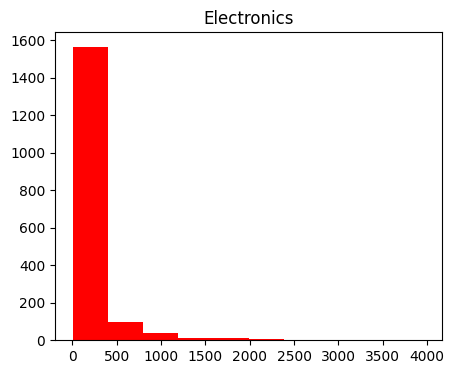

In [22]:
fig,(ax1)=plt.subplots(1,figsize=(5,4))
train_words=df[df['Product_Label']==2]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Electronics')

**Here we instantiate a BERT tokenizer and show an example of a tokenized text.**

In [23]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
a11 = 'Hi. Hacking , Dark Web, dark web analysis'
print('Original Text: ', a11, '\n')
print('Tokenized Text: ', tokenizer.tokenize(a11), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(a11)))

Loading BERT tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Original Text:  Hi. Hacking , Dark Web, dark web analysis 

Tokenized Text:  ['hi', '.', 'hacking', ',', 'dark', 'web', ',', 'dark', 'web', 'analysis'] 

Token IDs:  [7632, 1012, 23707, 1010, 2601, 4773, 1010, 2601, 4773, 4106]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## **Here we instantiate a BERT tokenizer and show an example of a tokenized text.(Cased)**

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

print('Original Text: ', a11, '\n')
print('Tokenized Text: ', tokenizer.tokenize(a11), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(a11)))

Loading BERT tokenizer...


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Original Text:  Hi. Hacking , Dark Web, dark web analysis 

Tokenized Text:  ['Hi', '.', 'Ha', '##cking', ',', 'Dark', 'Web', ',', 'dark', 'web', 'analysis'] 

Token IDs:  [8790, 119, 11679, 12944, 117, 4753, 9059, 117, 1843, 5127, 3622]


In [24]:
text_ids = [tokenizer.encode(text, max_length=256, pad_to_max_length=True, truncation=True) for text in texts]

text_ids[930]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


[101,
 2017,
 2064,
 3972,
 12870,
 2115,
 4735,
 2501,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [25]:
text_ids_lengths = [len(text_ids[i]) for i in range(len(text_ids))]
print(min(text_ids_lengths))
print(max(text_ids_lengths))

256
256


In [26]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)
att_masks[450]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Here we split the input and output arrays created before into train, validation, and test sets. We use 80% of the data for training, 10% for training validation, and 10% for final testing

In [27]:
from sklearn.model_selection import train_test_split

train_x, test_val_x, train_y, test_val_y = train_test_split(text_ids, labels, random_state=10, test_size=0.2)
train_m, test_val_m = train_test_split(att_masks, random_state=10, test_size=0.2)

test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, random_state=10, test_size=0.8)
test_m, val_m = train_test_split(test_val_m, random_state=10, test_size=0.8)

In [28]:
print(len(train_x))

5412


In [29]:
print(len(test_x))

270


In [30]:
print(len(val_x))

1083


We are working with the PyTorch artifacts in the transformers library, therefore we need our model input and output data as PyTorch tensors.

In [31]:
import torch

train_x = torch.tensor(train_x)
test_x = torch.tensor(test_x)
val_x = torch.tensor(val_x)
train_y = torch.tensor(train_y)
test_y = torch.tensor(test_y)
val_y = torch.tensor(val_y)
train_m = torch.tensor(train_m)
test_m = torch.tensor(test_m)
val_m = torch.tensor(val_m)

print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)
print(train_m.shape)
print(test_m.shape)
print(val_m.shape)

torch.Size([5412, 256])
torch.Size([270, 256])
torch.Size([1083, 256])
torch.Size([5412])
torch.Size([270])
torch.Size([1083])
torch.Size([5412, 256])
torch.Size([270, 256])
torch.Size([1083, 256])


To feed data into the model for training, we use Pytorch’s Dataset, DataLoader, and Sampler. For feeding training data, which drives model weights updates, we use the RandomSampler. For feeding the validation data we can use the SequentialSampler.

In [32]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_x, train_m, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_x, val_m, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

Here we instantiate our model class. We use a compact version, that is trained through model from a base BERT model and modified to include a classification layer at the output. This compact version has 12 transformer layers.

In [33]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT is a very large model. Unless you are freezing model weights in all layers but the classification layer, it is recommended to train it on a GPU.

## **Bert-Base-Case**

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

cuda


Here we print the model architecture and all model learnable parameters.

In [35]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of trainable parameters:', count_parameters(model), '\n', model)

Number of trainable parameters: 109484547 
 BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
       

In [36]:
[n for n, p in model.named_parameters()]

['bert.embeddings.word_embeddings.weight',
 'bert.embeddings.position_embeddings.weight',
 'bert.embeddings.token_type_embeddings.weight',
 'bert.embeddings.LayerNorm.weight',
 'bert.embeddings.LayerNorm.bias',
 'bert.encoder.layer.0.attention.self.query.weight',
 'bert.encoder.layer.0.attention.self.query.bias',
 'bert.encoder.layer.0.attention.self.key.weight',
 'bert.encoder.layer.0.attention.self.key.bias',
 'bert.encoder.layer.0.attention.self.value.weight',
 'bert.encoder.layer.0.attention.self.value.bias',
 'bert.encoder.layer.0.attention.output.dense.weight',
 'bert.encoder.layer.0.attention.output.dense.bias',
 'bert.encoder.layer.0.attention.output.LayerNorm.weight',
 'bert.encoder.layer.0.attention.output.LayerNorm.bias',
 'bert.encoder.layer.0.intermediate.dense.weight',
 'bert.encoder.layer.0.intermediate.dense.bias',
 'bert.encoder.layer.0.output.dense.weight',
 'bert.encoder.layer.0.output.dense.bias',
 'bert.encoder.layer.0.output.LayerNorm.weight',
 'bert.encoder.layer

In the following 5 cells we define our PyTorch optimizer and corresponding parameters, learning rate scheduler, and the training loop for the fine-tuning procedure. We train for 10 epochs.

In [37]:
learning_rate = 2e-5
adam_epsilon = 1e-8

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=adam_epsilon)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [38]:
from transformers import get_linear_schedule_with_warmup

num_epochs = 10
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [39]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [40]:
import numpy as np
import random

#seed_val = 3

#random.seed(seed_val)
#np.random.seed(seed_val)
#torch.manual_seed(seed_val)
#torch.cuda.manual_seed_all(seed_val)

In [41]:
train_losses = []
val_losses = []
num_mb_train = len(train_dataloader)
num_mb_val = len(val_dataloader)

if num_mb_val == 0:
    num_mb_val = 1

for n in range(num_epochs):
    train_loss = 0
    val_loss = 0
    start_time = time.time()

    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()

        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)

        loss = outputs[0]
        #loss = model_loss(outputs[1], mb_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        train_loss += loss.data / num_mb_train

    print ("\nTrain loss after itaration %i: %f" % (n+1, train_loss))
    train_losses.append(train_loss.cpu())

    with torch.no_grad():
        model.eval()

        for k, (mb_x, mb_m, mb_y) in enumerate(val_dataloader):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)

            outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)

            loss = outputs[0]
            #loss = model_loss(outputs[1], mb_y)

            val_loss += loss.data / num_mb_val

        print ("Validation loss after itaration %i: %f" % (n+1, val_loss))
        val_losses.append(val_loss.cpu())

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Time: {epoch_mins}m {epoch_secs}s')


Train loss after itaration 1: 0.466003
Validation loss after itaration 1: 0.250762
Time: 4m 0s

Train loss after itaration 2: 0.186694
Validation loss after itaration 2: 0.209398
Time: 4m 1s

Train loss after itaration 3: 0.131536
Validation loss after itaration 3: 0.222905
Time: 4m 1s

Train loss after itaration 4: 0.101552
Validation loss after itaration 4: 0.279825
Time: 4m 1s

Train loss after itaration 5: 0.081489
Validation loss after itaration 5: 0.306632
Time: 4m 2s

Train loss after itaration 6: 0.060974
Validation loss after itaration 6: 0.329542
Time: 4m 1s

Train loss after itaration 7: 0.047781
Validation loss after itaration 7: 0.349542
Time: 4m 1s

Train loss after itaration 8: 0.037593
Validation loss after itaration 8: 0.355331
Time: 4m 1s

Train loss after itaration 9: 0.031573
Validation loss after itaration 9: 0.380416
Time: 4m 1s

Train loss after itaration 10: 0.026867
Validation loss after itaration 10: 0.385348
Time: 4m 1s


<Axes: ylabel='count'>

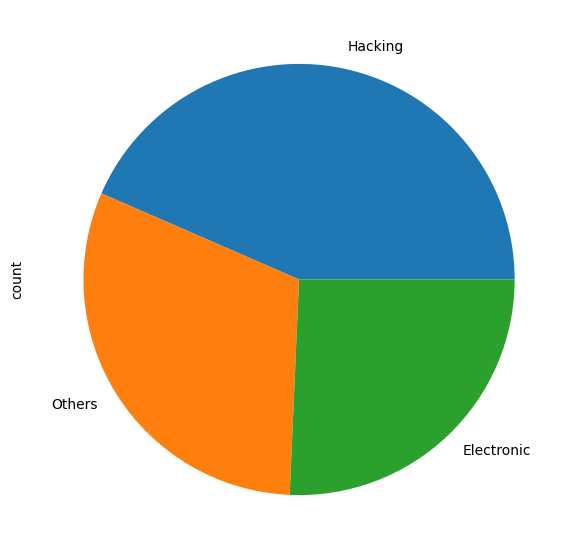

In [42]:
df.category.value_counts().plot(kind='pie', figsize=(7,7))

In [43]:
import pickle
import os

out_dir = './model'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(out_dir)
tokenizer.save_pretrained(out_dir)

with open(out_dir + '/train_losses.pkl', 'wb') as f:
    pickle.dump(train_losses, f)

with open(out_dir + '/val_losses.pkl', 'wb') as f:
    pickle.dump(val_losses, f)

In [44]:
out_dir = './model'

model = model = BertForSequenceClassification.from_pretrained(out_dir)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

with open(out_dir + '/train_losses.pkl', 'rb') as f:
    train_losses = pickle.load(f)

with open(out_dir + '/val_losses.pkl', 'rb') as f:
    val_losses = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


([<matplotlib.axis.XTick at 0x7c5710b15b70>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

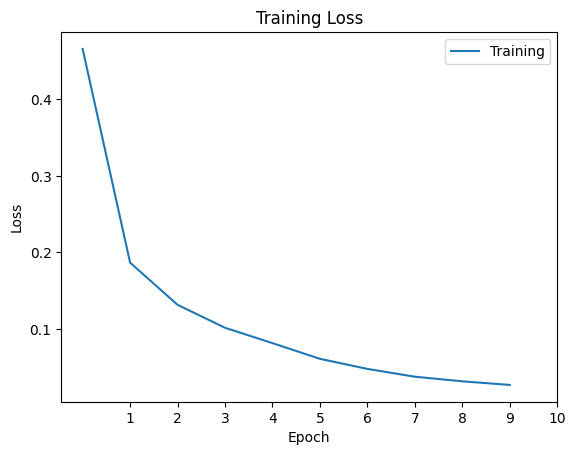

In [45]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(train_losses, label="Training")
#plt.plot(val_losses, label="Validation")

# Label the plot.
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

After instantiating a trained model, we can then score the test data and compute its accuracy. We then print the classification report and plot a confusion matrix.

The trained model gives us good results on the test data, being able to correctly classify 80% or more on each of the 6 distinct categories.

In [46]:
batch_size = 32

test_data = TensorDataset(test_x, test_m)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        output = model(mb_x, attention_mask=mb_m)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)

In [47]:
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()
true_values = test_y.numpy()

In [48]:
test_accuracy = np.sum(predicted_values == true_values) / len(true_values)
print ("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9296296296296296


In [49]:
from sklearn.metrics import classification_report

print(classification_report(true_values, predicted_values, target_names=[str(l) for l in label_values]))

              precision    recall  f1-score   support

      Others       1.00      0.93      0.97        74
     Hacking       0.89      0.96      0.92       122
  Electronic       0.93      0.88      0.90        74

    accuracy                           0.93       270
   macro avg       0.94      0.92      0.93       270
weighted avg       0.93      0.93      0.93       270



In [50]:
import itertools

# plot confusion matrix
# code borrowed from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 69   5   0]
 [  0 117   5]
 [  0   9  65]]
Normalized confusion matrix
[[0.93 0.07 0.  ]
 [0.   0.96 0.04]
 [0.   0.12 0.88]]


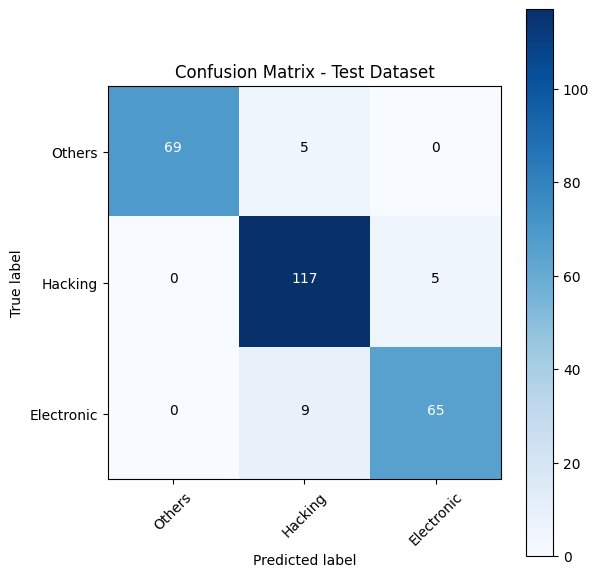

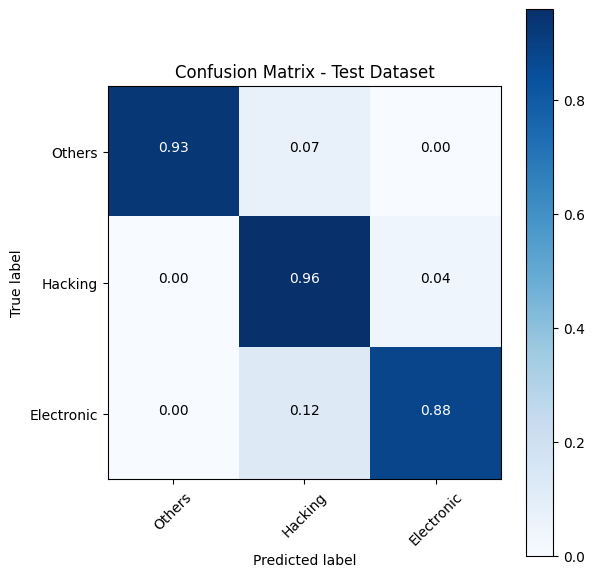

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

cm_test = confusion_matrix(true_values, predicted_values)

np.set_printoptions(precision=2)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset')
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset', normalize=True)